In [1]:
## Environment newurlenv

## install all necessary libraries

#pip install numpy
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install tldextract
#pip install sklearn
#pip install flask
#pip install pywebio


## Importing Libraries

In [2]:
# common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset
This is the dataset which we are using to fit model.

In [3]:
# loading dataset
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [4]:
# first 10 rows of dataset
data.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


In [5]:
#dimention of dataset
data.shape

(10000, 50)

In [6]:
# show all columns
pd.set_option('display.max_columns' , 100)

In [7]:
# show first 5 (by deafult) rows along with all columns
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [8]:
# resetting default ma_columns option to avoid overload on notebook
pd.reset_option("display.max_columns")

### ***Data Description***
(The columns which shows presence/absence result of particular character, is marked as ***Boolean*** here. Till now didn't check the datatype)
1. id: id of URL
2. NumDots: # '.' in URL
3. SubdomainLevel: #subdomainlevels 
4. PathLevel: depth of URL 
5. UrlLength: length of URL 
6. NumDash: # '-' in full URL 
7. NumDashInHostname: #'-' in hostname 
8. AtSymbol: Check if '@' present or not ***(Boolean)*** 
9. TildeSymbol: Check if '~' present or not ***(Boolean)***
10. NumUnderscore: # '_'
11. NumPercent: # '%'
12. NumQueryComponents: # query components
13. NumAmpersand: # '&'
14. NumHash: # '#'
15. NumNumericChars: # numeric characters
16. NoHttps: Check if 'https' present or not ***(Boolean)***
17. RandomString: Check if Random String present or not ***(Boolean)***
18. IpAddress: Check if the IP address is used or not in the hostname of the website URL ***(Boolean)***
19. DomainInSubdomains: Check if TLD (Top Level Domain) or ccTLD (Country Code Top Level Domain) is used as a part of the subdomain in website URL  ***(Boolean)***
20. DomainInPaths: Check if TLD or ccTLD is used in the link of website URL ***(Boolean)***
21. HttpsInHostname: Check if HTTPS is disordered in the hostname of website URL ***(Boolean)***
22. HostnameLength: length of hostname
23. PathLength: length of path
24. QueryLength: length of query
25. DoubleSlashInPath: Check if '//' exists in the link path ***(Boolean)***
26. NumSensitiveWords: Number of sensitive words (i.e., “secure”, “account”, “webscr”, “login”, “ebayisapi”,“sign in”,  “banking”, “confirm”) in website
27. EmbeddedBrandName: Brandname exists in the domain or not ***(Boolean)*** 
28. PctExtHyperlinks: The percentage of external hyper links in the HTML source code of website
29. PctExtResourceUrls: Percentage of URL external resource in HTML source codes of website
30. ExtFavicon: Check if favicon is installed from a hostname different from the URL hostname of website ***(Boolean)***
31. InsecureForms: Check if actions in the form containing the contend of URL without HTTPS protocol ***(Boolean)***
32. RelativeFormAction: Check if the action form contains a relative URL ***(Boolean)***
33. ExtFormAction: Check if the action form contains a external URL ***(Boolean)***
34. AbnormalFormAction: Check if the action form contains a abnormal URL ***(Boolean)***
35. PctNullSelfRedirectHyperlinks: Percentage of hyperlinks containing an empty value, an auto-redirecting value, such as “#”, URL of current website, or some abnormal values such as “file://E:/”
36. FrequentDomainNameMismatch: Check if the most frequent hostname in the HTML source code does not match the URL of website. ***(Boolean)***
37. FakeLinkInStatusBar: Check if HTML source code contains a JavaScript command on MouseOver to display a fake URL in the status bar ***(Boolean)***
38. RightClickDisabled: Check if HTML source code contains a JavaScript command to turn off the right click of the mouse ***(Boolean)***
39. PopUpWindow: Check if HTML source code contains a JavaScript command to start a popup window ***(Boolean)***
40. SubmitInfoToEmail: Check if HTML source code contains “mailto” in the HTML ***(Boolean)***
41. IframeOrFrame: Check if iframe or frame is used in HTML source codes ***(Boolean)***
42. MissingTitle: Check if the title tag is empty in HTML source codes ***(Boolean)***
43. ImagesOnlyInForm: Check if actions in the form of HTML source code does not contain text, but only images  ***(Boolean)***
44. SubdomainLevelRT: Correlated sub-domain level (-1,0,1) ***(Boolean)***
45. UrlLengthRT: Correlated length of URL (-1,0,1) ***(Boolean)***
46. PctExtResourceUrlsRT: Correlated percentage of external URL (-1,0,1) ***(Boolean)***
47. AbnormalExtFormActionR: Correlated abnormal actions in form (-1,0,1) ***(Boolean)***
48. ExtMetaScriptLinkRT: Correlated meta script link (-1,0,1) ***(Boolean)***
49. PctExtNullSelfRedirectHyperlinksRT: Correlated null self-redirect hyperlinks (-1,0,1) ***(Boolean)***
50. CLASS_LABEL: Gives output that link is malicious or not ***(Boolean)***


Now before doing any EDA or checking any kind of characteristic of the dataset, first we will check which features we can extract from elements. Among all features we can use only those features to train model which we can extract from links.
<br>
<br>
We'll use ***urldata.csv*** dataset, which contains links and only result that link is malicious or not ***(all malicious links are not phishing links, but we are using this dataset to show how to extract elements and store in a same csv)*** as we have to use a csv file containing links to validate our model.

In [9]:
#dataset to show elements extraction
data_url = pd.read_csv("urldata.csv", index_col=0)

In [10]:
# showing first 10 rows
data_url

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,http://atualizapj.com/,malicious,1


- one quick check
- here it is clearly seen that the row contanning label 'benign' and 'malicious' in column 'label' has value 0 and 1 respectively in 'result' column
- to see if there is any column 'result' which has value mismatch with column 'label'



In [11]:
data_url.label.value_counts()

benign       345738
malicious    104438
Name: label, dtype: int64

In [12]:
data_url.result.value_counts()

0    345738
1    104438
Name: result, dtype: int64

In [13]:
flag = False

for i in range(len(data_url['label'])):
    if data_url.iloc[i,1]=='benign' and data_url.iloc[i,2]!=0:
        flag=True
    if data_url.iloc[i,1]=='malicious' and data_url.iloc[i,2]!=1:
        flag=True   
        
print(flag)        

False


**There is no mismatch in 'label' and 'result' columns.**<br><br>
We can **drop 'label'** column to show csv with extracted elements.

In [14]:
#drop 'label' column
data_url.drop('label', axis=1, inplace=True)

In [15]:
#show first 5 and last 5 rows 
data_url

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0
...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,1
450174,http://atualizapj.com/,1


## Code to Extract Features from Given URL

In [16]:
# libraries for element extraction from urls
from urllib import parse
from urllib.parse import urlparse
import tldextract 

In [17]:
data_url['UrlLength'] = [len(i) for i in data_url['url']]
data_url['NumDash'] = [i.count('-') for i in data_url['url']]
data_url['NumDots'] = [i.count('.') for i in data_url['url']]
data_url['NumUnderscore'] = [i.count('_') for i in data_url['url']]
data_url['NumPercent'] = [i.count('%') for i in data_url['url']]
data_url['NumAmpersand'] = [i.count('&') for i in data_url['url']]
data_url['NumHash'] = [i.count('#') for i in data_url['url']]
data_url['NumDashInHostname'] = [(urlparse(i).netloc).count('-') for i in data_url['url']]
data_url['NumNumericChars'] = [sum(c.isdigit() for c in i) for i in data_url['url']]
data_url['AtSymbol'] = [0 if c[1].find('@')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['TildeSymbol'] = [0 if c[1].find('~')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['NoHttps'] = [0 if c[1].find('https')==-1 else 1 for c in data_url['url'].iteritems()]
data_url['IpAddress'] = np.where(data_url['url'].str.match('^(http|https)://\d+\.\d+\.\d+\.\d+\.*') == True, 1, 0)
data_url['SubdomainLevel'] = [len(tldextract.extract(i).subdomain.split('.')) for i in data_url['url']]
data_url['NumQueryComponents'] = [len(dict(parse.parse_qs(parse.urlsplit(i, allow_fragments=False).query))) for i in data_url['url']]
data_url['HostnameLength'] = [len(urlparse(i).netloc) for i in data_url['url']]
data_url['PathLength'] = [len(urlparse(i).path) for i in data_url['url']]
data_url['QueryLength'] = [len(urlparse(i).query) for i in data_url['url']]
data_url['DoubleSlashInPath'] = [0 if urlparse(c[1]).path.find('//')==-1 else 1 for c in data_url['url'].iteritems()]   

In [18]:
# first preview of data
data_url

,url,result,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,...,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath
0,https://www.google.com,0,22,0,2,0,0,0,0,0,...,0,0,1,0,1,0,14,0,0,0
1,https://www.youtube.com,0,23,0,2,0,0,0,0,0,...,0,0,1,0,1,0,15,0,0,0
2,https://www.facebook.com,0,24,0,2,0,0,0,0,0,...,0,0,1,0,1,0,16,0,0,0
3,https://www.baidu.com,0,21,0,2,0,0,0,0,0,...,0,0,1,0,1,0,13,0,0,0
4,https://www.wikipedia.org,0,25,0,2,0,0,0,0,0,...,0,0,1,0,1,0,17,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,1,43,1,2,0,0,0,0,1,...,0,0,0,0,1,0,11,25,0,0
450172,http://faboleena.com/js/infortis/jquery/plugin...,1,159,0,2,2,0,0,0,0,...,0,0,0,0,1,0,13,139,0,0
450173,http://faboleena.com/js/infortis/jquery/plugin...,1,147,0,1,1,0,0,0,0,...,0,0,0,0,1,0,13,127,0,0
450174,http://atualizapj.com/,1,22,0,1,0,0,0,0,0,...,0,0,0,0,1,0,14,1,0,0


Our validation data will look like this.

In [19]:
# now setting options max_columns, max_rows, max_colwidth to see the results more clearly.
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_colwidth' , None)

In [20]:
# let's see first 1000 rows
## part of benign urls
data_url.head(1000)

,url,result,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,NumNumericChars,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath
0,https://www.google.com,0,22,0,2,0,0,0,0,0,0,0,0,1,0,1,0,14,0,0,0
1,https://www.youtube.com,0,23,0,2,0,0,0,0,0,0,0,0,1,0,1,0,15,0,0,0
2,https://www.facebook.com,0,24,0,2,0,0,0,0,0,0,0,0,1,0,1,0,16,0,0,0
3,https://www.baidu.com,0,21,0,2,0,0,0,0,0,0,0,0,1,0,1,0,13,0,0,0
4,https://www.wikipedia.org,0,25,0,2,0,0,0,0,0,0,0,0,1,0,1,0,17,0,0,0
5,https://www.reddit.com,0,22,0,2,0,0,0,0,0,0,0,0,1,0,1,0,14,0,0,0
6,https://www.yahoo.com,0,21,0,2,0,0,0,0,0,0,0,0,1,0,1,0,13,0,0,0
7,https://www.google.co.in,0,24,0,3,0,0,0,0,0,0,0,0,1,0,1,0,16,0,0,0
8,https://www.qq.com,0,18,0,2,0,0,0,0,0,0,0,0,1,0,1,0,10,0,0,0
9,https://www.amazon.com,0,22,0,2,0,0,0,0,0,0,0,0,1,0,1,0,14,0,0,0


In [21]:
# let's see last 1000 rows
## part of malicious urls
data_url.tail(1000)

,url,result,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,NumNumericChars,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath
449176,http://sitesumo.com/Microsoft-drivers2017/main.html,1,51,1,2,0,0,0,0,0,4,0,0,0,0,1,0,12,32,0,0
449177,http://ictsupportwebmail.form2pay.com/HELPDESK.html,1,51,0,3,0,0,0,0,0,1,0,0,0,0,1,0,30,14,0,0
449178,http://compattabili.it/cli/js/webapps/Sing-in/Login.php,1,55,1,2,0,0,0,0,0,0,0,0,0,0,1,0,15,33,0,0
449179,http://bit.ly/2k9Z7I2,1,21,0,1,0,0,0,0,0,4,0,0,0,0,1,0,6,8,0,0
449180,http://www.trustedfoodindustry.com/Confirmation/signin.php,1,58,0,3,0,0,0,0,0,0,0,0,0,0,1,0,27,24,0,0
449181,http://decotechco.ir/act/,1,25,0,1,0,0,0,0,0,0,0,0,0,0,1,0,13,5,0,0
449182,http://outlook111.form2pay.com/195681.html,1,42,0,3,0,0,0,0,0,10,0,0,0,0,1,0,23,12,0,0
449183,http://sg1.cycom.asia/~sinovant/useruploads/images/jn.php,1,57,0,3,0,0,0,0,0,1,0,1,0,0,1,0,14,36,0,0
449184,http://sahilsaveranews.com/wp-includes/images/wp.signin.htm,1,59,1,3,0,0,0,0,0,0,0,0,0,0,1,0,19,33,0,0
449185,http://cooltest.com.cn/cert/,1,28,0,2,0,0,0,0,0,0,0,0,0,0,1,0,15,6,0,0


In [22]:
# resetting default max_columns option to avoid overload on notebook
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")
pd.reset_option("display.max_colwidth")

### ***Datset for this to check***

In [23]:
# our dataset of use will be
# other than the elements which can't be extracted for now, we have also dropped 'id' column 
data_in_use = data[['UrlLength','NumDash','NumDots','NumUnderscore','NumPercent','NumAmpersand','NumHash','NumDashInHostname','NumNumericChars','AtSymbol','TildeSymbol','NoHttps','IpAddress','SubdomainLevel','NumQueryComponents','HostnameLength','PathLength','QueryLength','DoubleSlashInPath','CLASS_LABEL']]

In [24]:
# base dataset preview
data_in_use

,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,NumNumericChars,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL
0,72,0,3,0,0,0,0,0,0,0,0,1,0,1,0,21,44,0,0,1
1,144,0,3,2,0,1,0,0,41,0,0,1,0,1,2,17,16,103,0,1
2,58,0,3,0,0,0,0,0,0,0,0,1,0,1,0,27,24,0,0,1
3,79,1,3,0,0,0,0,0,0,0,0,1,0,1,0,22,50,0,0,1
4,46,0,3,0,0,0,0,0,2,0,0,1,0,0,0,10,29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,0,3,0,0,1,0,0,9,0,0,1,0,1,2,15,10,17,0,0
9996,59,1,2,0,0,0,0,0,0,0,0,1,0,1,0,19,33,0,0,0
9997,57,0,2,0,0,0,0,0,6,0,0,1,0,1,0,16,34,0,0,0
9998,49,0,3,0,0,0,0,0,3,0,0,1,0,1,1,15,13,13,0,0


In [25]:
# dimention of base dataset
data_in_use.shape

(10000, 20)

It has **19 features of url** and one column **"CLASS_LABEL"** contains its label as **'Phishing Url' or 'Non-Phishing Url' (values 0 or 1 respectively).**

### ***About Dataset***

In [26]:
data_in_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   UrlLength           10000 non-null  int64
 1   NumDash             10000 non-null  int64
 2   NumDots             10000 non-null  int64
 3   NumUnderscore       10000 non-null  int64
 4   NumPercent          10000 non-null  int64
 5   NumAmpersand        10000 non-null  int64
 6   NumHash             10000 non-null  int64
 7   NumDashInHostname   10000 non-null  int64
 8   NumNumericChars     10000 non-null  int64
 9   AtSymbol            10000 non-null  int64
 10  TildeSymbol         10000 non-null  int64
 11  NoHttps             10000 non-null  int64
 12  IpAddress           10000 non-null  int64
 13  SubdomainLevel      10000 non-null  int64
 14  NumQueryComponents  10000 non-null  int64
 15  HostnameLength      10000 non-null  int64
 16  PathLength          10000 non-null  int64

All columns are in numeric (int64) datatype and there is **no missing value in any column**.

In [27]:
# summary
data_in_use.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,NumNumericChars,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,70.264100,1.818000,2.445100,0.32320,0.073800,0.277200,0.002300,0.138900,5.810300,0.000300,0.013100,0.988800,0.017200,0.586800,0.458600,18.82430,35.564900,8.606500,0.000900,0.500000
std,33.369877,3.106258,1.346836,1.11466,0.622248,1.117356,0.047906,0.545744,9.617877,0.017319,0.113709,0.105241,0.130023,0.751214,1.344793,8.11654,24.588502,24.313053,0.029988,0.500025
min,12.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000
1%,24.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,1.000000,0.000000,0.000000,0.000000
5%,33.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.00000,6.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.00000,18.000000,0.000000,0.000000,0.000000
50%,62.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,18.00000,30.000000,0.000000,0.000000,0.500000
75%,84.000000,2.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,22.00000,48.000000,0.000000,0.000000,1.000000
90%,111.000000,6.000000,4.000000,1.00000,0.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,26.00000,69.000000,31.000000,0.000000,1.000000


Now check total number of unique values in column.

In [28]:
#checking for number of unique values in each column
for col in data_in_use:
    print(col,'------>',len(data_in_use[col].unique()))

UrlLength ------> 226
NumDash ------> 25
NumDots ------> 17
NumUnderscore ------> 16
NumPercent ------> 14
NumAmpersand ------> 16
NumHash ------> 2
NumDashInHostname ------> 10
NumNumericChars ------> 82
AtSymbol ------> 2
TildeSymbol ------> 2
NoHttps ------> 2
IpAddress ------> 2
SubdomainLevel ------> 13
NumQueryComponents ------> 19
HostnameLength ------> 74
PathLength ------> 147
QueryLength ------> 164
DoubleSlashInPath ------> 2
CLASS_LABEL ------> 2


Now here we can see that all the columns contains discrete values. So to check total number of unique values, max present value in a class we can convert each column into category type and check summary.

In [29]:
data_in_use=data_in_use.astype(str) # all columns will convert to object datatype

In [30]:
data_in_use.describe()

,UrlLength,NumDash,NumDots,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumDashInHostname,NumNumericChars,AtSymbol,TildeSymbol,NoHttps,IpAddress,SubdomainLevel,NumQueryComponents,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,226,25,17,16,14,16,2,10,82,2,2,2,2,13,19,74,147,164,2,2
top,48,0,2,0,0,0,0,0,0,0,0,1,0,0,0,17,1,0,0,1
freq,192,5001,4053,8617,9727,8975,9977,9066,4266,9997,9869,9888,9828,4835,8134,755,326,8013,9991,5000


From here (the last column **CLASS_LABEL**) we can also conclude that there are **5000 phishing** url among 10000 urls with no missing value. So **dataset is completely balanced**.

Change all columns to numeric for further analysis.

In [31]:
data_in_use=data_in_use.astype(int)  # all columns will convert to int32 datatype

- So here data contains **NO MISSING VALUE** 
- Dataset is **BALANCED**

Now we proceed to fit our baseline model which is **Logistic Regression** with default parameters.

## Baseline Model (Default Logistic Model)
Now we will create logistic regression model with dafault hyperparameters...with all features present in our base dataset. This will be our baseline model. As the dataset is balanced, we will use **Accuracy** as measure of model.
<br><br>
As we are applying logistic regression, not going to apply scaling here, as scaling with not have any impact on results of logistic regression.

In [32]:
# import libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
# divide data into base independent(X) and dependent(y) features

X = data_in_use.iloc[:,0:19]
y = data_in_use['CLASS_LABEL']

In [34]:
# show base independent and dependent data

print("data_in_use")
print('\n')

# Independent Features
print('Independent Features:')
print('Dimention:',X.shape)
print('Column Names:')
print(X.columns)
print('First few rows:')
pd.set_option('display.max_columns' , 20)
print(X.head())
pd.reset_option('display.max_columns')

print('\n')

# Dependent Features
print('Dependent Feature: CLASS_LABEL')
print('Dimention:',y.shape)
print('First few values:')
print(y.head())

data_in_use


Independent Features:
Dimention: (10000, 19)
Column Names:
Index(['UrlLength', 'NumDash', 'NumDots', 'NumUnderscore', 'NumPercent',
       'NumAmpersand', 'NumHash', 'NumDashInHostname', 'NumNumericChars',
       'AtSymbol', 'TildeSymbol', 'NoHttps', 'IpAddress', 'SubdomainLevel',
       'NumQueryComponents', 'HostnameLength', 'PathLength', 'QueryLength',
       'DoubleSlashInPath'],
      dtype='object')
First few rows:
   UrlLength  NumDash  NumDots  NumUnderscore  NumPercent  NumAmpersand  \
0         72        0        3              0           0             0   
1        144        0        3              2           0             1   
2         58        0        3              0           0             0   
3         79        1        3              0           0             0   
4         46        0        3              0           0             0   

   NumHash  NumDashInHostname  NumNumericChars  AtSymbol  TildeSymbol  \
0        0                  0        

In [35]:
# divide data into base training and testing set
## we will use 20% as test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("data_in_use")
print('Training split : X_train_shape =', X_train.shape, ',   y_train_shape =', y_train.shape)
print('Testing split : X_test_shape =', X_test.shape, ',   y_test_shape =', y_test.shape)

data_in_use
Training split : X_train_shape = (8000, 19) ,   y_train_shape = (8000,)
Testing split : X_test_shape = (2000, 19) ,   y_test_shape = (2000,)


C:\Users\Koyel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 
 [[794 194]
 [171 841]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       988
           1       0.81      0.83      0.82      1012

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Logistic Model (baseline) ROC AUC =  0.88


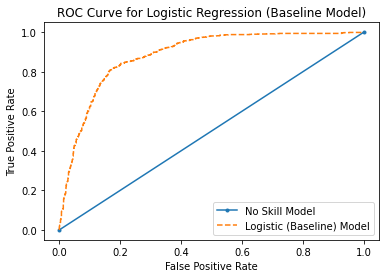

Training accuracy of Logistic Regression:  0.82
Testing accuracy of Logistic Regression:  0.82


In [36]:
# fit logistic model with default hyperparameters

## model training
classifier = LogisticRegression(random_state=0)
logistic_model = classifier.fit(X_train, y_train)


## prediction
predictions_training = logistic_model.predict(X_train)
predictions_testing = logistic_model.predict(X_test)

## Confusion Matrix
cm = confusion_matrix(y_test, predictions_testing)
print("Confusion Matrix : \n", cm)

## Classification Report
print(classification_report(y_test, predictions_testing))

## probability of falling into a particular class from each observation
probs = logistic_model.predict_proba(X_test)
probs = probs[:,1]

## AUC (Area Under Curve) Score
auc_score = roc_auc_score(y_test, probs)
print("Logistic Model (baseline) ROC AUC = ",format(auc_score,"0.2f"))


## no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, linestyle='--', label='Logistic (Baseline) Model')
plt.title("ROC Curve for Logistic Regression (Baseline Model)")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show legend
plt.legend()
# show the plot
plt.show()


## Training and Tesing Accuracy
print("Training accuracy of Logistic Regression: ", format(accuracy_score(y_train,predictions_training),"0.2f"))
print("Testing accuracy of Logistic Regression: ", format(accuracy_score(y_test, predictions_testing),"0.2f"))

# Saving Model as Pickle file

In [37]:
import pickle

In [38]:
## Save the trained model (baseline) as pickle string
with open('Baseline(Logistic).pickle','wb') as ft:
    pickle.dump(logistic_model,ft)

# Creating requirements.txt

In [39]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
